## No mask ##

Training time: 1780.777393579483 seconds with H = 16 d= 23

3707.0626146793365 seconds training time HKRR with H = 32 d= 23

4642.449977874756 seconds training time HKRR with H = 40 d= 23

6003.049374341965 seconds training time HKRR with H = 48 d= 23


## With maks ##

5695.0701994895935 seconds for H = 32 and d = 23 with epochs 300 e mask

5623.193186998367 seconds for H = 45 and d=32 with epochs 200 (no stop loss) e mask

5676.9955179691315 seconds for H = 32, d = 23 but with H1 = 14, H2 = 14 and 4

7143.904688358307 seconds for H = 40, d = 18 with H1 = 18, H2 = 18 and 4

In [ ]:
########################## DO NOT RUN IT UNLESS YOU DON'T HAVE THE PROCESSED FILE ############################

def adjust_number(num):
    """
    Adjust the number based on the following rules:
    - Add +2 if num >= 88
    - Else if num >= 64, add +1
    - Else, no change
    """
    if num >= 87:
        return num + 2
    elif num >= 64:
        return num + 1
    else:
        return num

def process_existing_dat(input_dat, output_dat):
    """
    Processes the existing .dat file:
    - Adjusts the first two columns based on the specified conditions.
    - Retains the third column as is.
    """
    with open(input_dat, 'r') as infile, open(output_dat, 'w') as outfile:
        for line_num, line in enumerate(infile, start=1):
            stripped_line = line.strip()
            if not stripped_line:
                continue  # Skip empty lines
            parts = stripped_line.split()
            
            # Handle lines with insufficient columns
            if len(parts) < 3:
                print(f"Warning: Line {line_num} does not have enough columns. Skipping.")
                continue
            
            try:
                col1 = float(parts[0])
                col2 = float(parts[1])
                col3 = parts[2]  # Keep as string to retain original formatting
                
                # Adjust the first two columns
                adjusted_col1 = adjust_number(col1)
                adjusted_col2 = adjust_number(col2)
                
                # Format the output with two decimal places for the first two columns
                # and retain the third column as is
                outfile.write(f"{adjusted_col1:.2f} {adjusted_col2:.2f} {col3}\n")
            except ValueError as ve:
                print(f"Error: Line {line_num} contains non-numeric data. Skipping. ({ve})")
                continue

def append_additional_lines(output_dat, start_num, end_num, fixed_num):
    """
    Appends lines to the .dat file where:
    - The first column is fixed_num
    - The second column ranges from start_num to end_num (inclusive)
    - The third column is 100
    """
    with open(output_dat, 'a') as outfile:
        for second_col in range(start_num, end_num + 1):
            # Format the numbers to two decimal places
            line = f"{fixed_num:.2f} {second_col:.2f} 100\n"
            outfile.write(line)


# structfile 
input_dat = '/home/ale_durso/Documents/EPFL/MA5/master_project/CODE/DataAttentionDCA/data/lisa_data/HK-RR_old.dat'
output_dat = '/home/ale_durso/Documents/EPFL/MA5/master_project/CODE/DataAttentionDCA/data/lisa_data/HK-RR_old_processed.dat'

# Step 1: Process the existing .dat file
process_existing_dat(input_dat, output_dat)

# Step 2: Append additional lines
# Add lines for fixed_num = 64.00
append_additional_lines(output_dat, 65, 176, 64.00)

# Add lines for fixed_num = 88.00
append_additional_lines(output_dat, 89, 176, 88.00)

print(f"Transformation complete. Output saved to {output_dat}")




In [ ]:
import os
import torch

import numpy as np

from CODE.AttentionDCA_python.src.plot_functions import graphAtt, graphPPV, contact_plot
from CODE.AttentionDCA_python.src.dcascore import score, compute_PPV

cwd = os.getcwd()
print(cwd)

filename =  cwd + '/CODE/DataAttentionDCA/data/PF00014/PF00014_mgap6.fasta.gz'
structfile = cwd + '/CODE/DataAttentionDCA/data/PF00014/PF00014_struct.dat'

filename = cwd + '/CODE/DataAttentionDCA/data/lisa_data/HK-RR_concatenated_nodupli.fasta'
structfile = cwd + '/CODE/DataAttentionDCA/data/lisa_data/HK-RR_old_processed.dat'

/home/ale_durso/Documents/EPFL/MA5/master_project/Attention DCA


In [1]:
def read_tensor_from_txt(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    # Read the dimensions from the first line
    dims = list(map(int, lines[0].strip().split()))
    
    # Initialize a list to hold the tensor data
    tensor_data = []
    
    current_slice = []
    for line in lines[1:]:
        line = line.strip()
        if line.startswith("Slice"):
            if current_slice:  # If there is an existing slice, save it
                tensor_data.append(current_slice)
                current_slice = []
        elif line:  # Process non-empty lines
            current_slice.append(list(map(float, line.split(','))))
    
    if current_slice:  # Append the last slice
        tensor_data.append(current_slice)
    
    # Convert the list back into a tensor with the original dimensions
    tensor = torch.tensor(tensor_data).view(*dims)
    return tensor

H = 48
d = 23
loss_type = 'without_J'
family = 'HK-RR'

epochs = 300
# Example usage
K48_23 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))
Q48_23 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))
V48_23 = read_tensor_from_txt(cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))


H = 40
d= 23
K40_23 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))
Q40_23 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs)) 
V40_23 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))

H = 32
d= 23
epochs = 500
K32_23 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))
Q32_23 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs)) 
V32_23 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))

H = 16
d= 23
epochs = 500
K16_23 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))
Q16_23 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs)) 
V16_23 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs)) 


H = 32
d = 10
epochs = 300
K32_10 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))
Q32_10 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))
V32_10 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))

'HK-RR_parallel'
H = 32
d = 23
epochs = 300
K32_23_parall = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))
Q32_23_parall = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))
V32_23_parall = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))


family = 'HK-RR_prova'
H = 32
d= 23
epochs = 300
K32_23_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))
Q32_23_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs)) 
V32_23_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))


family = 'HK-RR_reprova_45_23'
H = 45
d= 23
epochs = 200
K45_23_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))
Q45_23_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs)) 
V45_23_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))

family = 'HK-RR_reprova_32_23_HS14_14_4'
H = 32
d= 23
epochs = 300
K32_23_mask_14_4 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))
Q32_23_mask_14_4 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs)) 
V32_23_mask_14_4 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))



family = 'HK-RR_new_mask_14_14_4'
H = 32
d= 23
epochs = 300
K32_23_new_mask_14_14_4 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))
Q32_23_new_mask_14_14_4 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs)) 
V32_23_new_mask_14_14_4 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))

family = 'HK-RR_new2_mask_14_14_4'
H = 32
d= 23
epochs = 10
K32_23_new2_mask_14_14_4 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))
Q32_23_new2_mask_14_14_4 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs)) 
V32_23_new2_mask_14_14_4 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))


family = 'HK-RR_reprova_40_18_HS18_18_4'
H = 40
d= 18
epochs = 300
K40_18_mask_18_4 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))
Q40_18_mask_18_4 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs)) 
V40_18_mask_18_4 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))

family = 'pf14_wo_new_mask_14_14_4'
H = 32
d= 23
epochs = 100

K32_23_wo_new_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))
Q32_23_wo_new_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs)) 
V32_23_wo_new_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, epochs=epochs))

H = 32
d= 23
n_epochs = 300

family = 'HK-RR_new_mask_14_14_4correct'
K32_23_new_mask_14_14_4correct = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Q32_23_new_mask_14_14_4correct = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
V32_23_new_mask_14_14_4correct = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))

H = 32
d= 23
n_epochs = 300

family = 'HK-RR_new_mask_14_14_4_newhope_correct'
K32_23_new_mask_14_14_4_newhope_correct = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Q32_23_new_mask_14_14_4_newhope_correct = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
V32_23_new_mask_14_14_4_newhope_correct = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))


family = 'HK-RR_new_mask_14_14_4_wtf_newhope_correct'
H = 32
d= 23
n_epochs = 300
K32_23_new_mask_14_14_4_wtf_newhope_correct = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Q32_23_new_mask_14_14_4_wtf_newhope_correct = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
V32_23_new_mask_14_14_4_wtf_newhope_correct = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
# print("K Tensor Dimensions:", K.shape)
# print("Q Tensor Dimensions:", Q.shape)
# print("V Tensor Dimensions:", V.shape)
# N = K.shape[-1]

NameError: name 'cwd' is not defined

In [3]:
family = 'HK-RR_new_mask_14_14_4_66_newhope_correct'
H = 32
d= 23
n_epochs = 300
K32_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Q32_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
V32_23_w_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))

family = 'HK-RR_wo_new_mask_newhope_correct'
H = 32
d= 23
n_epochs = 300
K32_23_wo_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Q32_23_wo_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
V32_23_wo_mask = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))

176


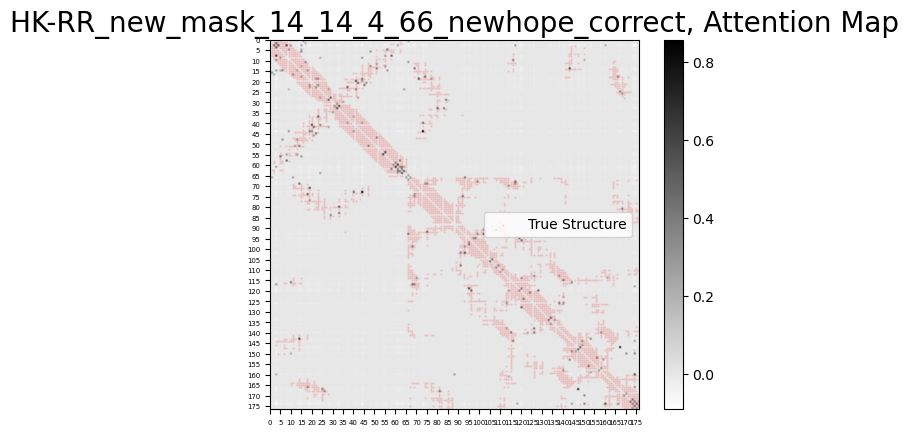

In [4]:
N =Q32_23_w_mask.shape[-1]
print(N)
# Define other parameters
family = 'HK-RR_new_mask_14_14_4_66_newhope_correct'
H = 32
d= 23
epochs = 300

PFname = family

ticks = np.arange(0, N, 5)  # Example tick positions

k=10

# Call graphAtt function
graphAtt(Q32_23_w_mask, K32_23_w_mask, V32_23_w_mask, 
         structfile, PFname, ticks, k=k, version='mean', sqr=False, APC=True, all = False, head_mask= 66 )

In [11]:
ranking32_23_w_mask, _ = score(Q32_23_w_mask, K32_23_w_mask, V32_23_w_mask, separation_heads= 66)
PPVs32_23_w_mask = [compute_PPV(ranking32_23_w_mask, structfile, cutoff= 8)]

ranking32_23_wo_mask, _ = score(Q32_23_wo_mask, K32_23_wo_mask, V32_23_wo_mask)
PPVs32_23_wo_mask = [compute_PPV(ranking32_23_wo_mask, structfile, cutoff= 8)]

In [38]:
from CODE.AttentionDCA_python.src.dcascore import ZeroSumGauge, gauge, compute_fn, correct_APC, compute_ranking

"""
Computes contact scores for each domain and inter-domain interactions.
Parameters:
- Q: Query tensor of shape (H, D, L)
- K: Key tensor of shape (H, D, L)
- V: Value tensor of shape (H, A, B)
- masks: Dictionary containing masks for 'domain1', 'domain2', 'inter_domain'
- min_separation: Minimum separation between residues
Returns:
- global_top_scores: List of top tuples (i, j, score) across all domains
- JT_dict: Dictionary of transformed J tensors for each domain
"""
min_separation = 6
# Initialize a dictionary to store J tensors for each domain
JT_dict = {}
# Initialize a list to store rankings from each domain
rankings = []
domain_keys = ['domain1', 'domain2', 'inter_domain']
sf = torch.zeros(N, N, H)
H1 = 14
H2 = 28
device = 'cpu'
Q = Q32_23_new_mask_14_14_4_wtf_newhope_correct
K = K32_23_new_mask_14_14_4_wtf_newhope_correct
V = V32_23_new_mask_14_14_4_wtf_newhope_correct

for domain_key in domain_keys:
    print(f"Processing {domain_key} interactions...")
    # Create interaction mask based on the current domain
    if domain_key == 'domain1':
        sf_domain = sf[:69, :69, :H1].permute(2, 0, 1)
        V_h = V[:H1,:,:]
        L = sf[:69, :69, :H1].permute(2, 0, 1).shape[1]
    elif domain_key == 'domain2':
        sf_domain = sf[69:, 69:, H1:H2].permute(2, 0, 1)
        V_h = V[H1:H2,:,:]
        L = sf[69:, 69:, H1:H2].permute(2, 0, 1).shape[1]
    elif domain_key == 'inter_domain':
        sf_domain = sf[:, :, H2:].permute(2, 0, 1)
        V_h = V[H2:,:,:]
        L = sf[:, :, H2:].permute(2, 0, 1).shape[1]
    # Compute J tensor for the current domain
    Jtens = torch.einsum('hri,hab->abri', sf_domain, V_h)  # Shape: (A, B, L, L)
    H, A, _ = V.shape
    
    # Symmetrize Jtens
    Jtens = 0.5 * (Jtens + Jtens.permute(1, 0, 3, 2))  # Ensure symmetry
    # Convert J to CPU and NumPy for further processing
    J_np = Jtens.cpu().detach().numpy().astype(np.float64)
    # Apply gauge transformation
    h = np.zeros((A, L))  # Assuming h is zero for simplicity
    gauge_type = ZeroSumGauge()
    JT, hT = gauge(J_np, h, gauge_type)
    JT_np = np.array(JT)
    # Store the transformed J
    JT_dict[domain_key] = JT_np
    # Convert JT back to PyTorch tensor for scoring
    Jzsg_tensor = torch.from_numpy(JT_np).to(device)
    # Compute Frobenius norms
    FN = compute_fn(Jzsg_tensor)
    # Correct for Average Product Correction
    FNapc = correct_APC(FN)
    # Compute ranking
    ranking = compute_ranking(FNapc, min_separation)
    # Store ranking with domain information
    
    if domain_key == 'domain2':
        shifted_ranking = []
        for i, j, score in ranking:
            shifted_ranking.append((i+69, j+69, score))
        rankings.append(shifted_ranking)
    else:
        rankings.append(ranking)
# Aggregate rankings from all domains
# Flatten the list of rankings
all_rankings = [item for sublist in rankings for item in sublist]
# Sort all_rankings by score descending
all_rankings.sort(key=lambda x: x[2], reverse=True)
    


Processing domain1 interactions...
Processing domain2 interactions...
Processing inter_domain interactions...


In [46]:
#not nan values in ranking[1] where is is a tuple (i,j,score), take the non nan score
new = [x for x in rankings[1] if not np.isnan(x[2])]
new

[]

In [7]:
PPVssprova = [compute_PPV(all_rankings, structfile, cutoff= 8)]

In [13]:
# ranking, _ = score(Q, K, V)
# PPVs = [compute_PPV(ranking, structfile, cutoff= 10)] #fallo con i 10 armstrong
# #cambio H and t ae vedi tempo
# labels = ["AttentionDCA"]
# figtitle = "PPV Sequence"
# graphPPV(PPVs, labels, figtitle, fig_size=(8, 6), colors=["b"], fs=15)

#do it for all the models so that I can plot the ppv for Q48_23, K48_23, etc Q40_23, etc Q32_23,  Q16_23
from CODE.AttentionDCA_python.src.dcascore import score, compute_PPV
ranking48_23, _ = score(Q48_23, K48_23, V48_23)
PPVs48_23 = [compute_PPV(ranking48_23, structfile, cutoff= 8)]

ranking40_23, _ = score(Q40_23, K40_23, V40_23)
PPVs40_23 = [compute_PPV(ranking40_23, structfile, cutoff= 8)]

ranking32_23, JT_np_32_23 = score(Q32_23, K32_23, V32_23)
PPVs32_23 = [compute_PPV(ranking32_23, structfile, cutoff= 8)]

ranking16_23, _ = score(Q16_23, K16_23, V16_23)
PPVs16_23 = [compute_PPV(ranking16_23, structfile, cutoff= 8)]

ranking32_10, _ = score(Q32_10, K32_10, V32_10)
PPVs32_10 = [compute_PPV(ranking16_23, structfile, cutoff= 8)]


ranking32_23_mask, _ = score(Q32_23_mask, K32_23_mask, V32_23_mask)
PPVs32_23_mask = [compute_PPV(ranking32_23_mask, structfile, cutoff= 8)]

ranking45_23_mask, _ = score(Q45_23_mask, K45_23_mask, V45_23_mask)
PPVs45_23_mask = [compute_PPV(ranking45_23_mask, structfile, cutoff= 8)]



ranking32_23_parall, _ = score(Q32_23_parall, K32_23_parall, V32_23_parall)
PPVs32_23_parall = [compute_PPV(ranking32_23_parall, structfile, cutoff= 8)]




In [26]:
from CODE.AttentionDCA_python.src.plot_functions import attention_heads
W = attention_heads(Q32_23_new_mask_14_14_4_wtf_newhope_correct, K32_23_new_mask_14_14_4_wtf_newhope_correct, V32_23_new_mask_14_14_4_wtf_newhope_correct)

ranking32_23_new_mask_14_14_4_wtf_newhope_correct, _ = score(Q32_23_new_mask_14_14_4_wtf_newhope_correct, K32_23_new_mask_14_14_4_wtf_newhope_correct, V32_23_new_mask_14_14_4_wtf_newhope_correct, W = W)
PPVs32_23_new_mask_14_14_4_wtf_newhope_correct = [compute_PPV(ranking32_23_new_mask_14_14_4_wtf_newhope_correct, structfile, cutoff= 8)]

In [29]:
PPV_prova = [compute_PPV(all_rankings, structfile, cutoff= 8)]

/home/ale_durso/Documents/EPFL/MA5/master_project/Attention DCA/CODE/AttentionDCA_python/src/plot_functions.py:359: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


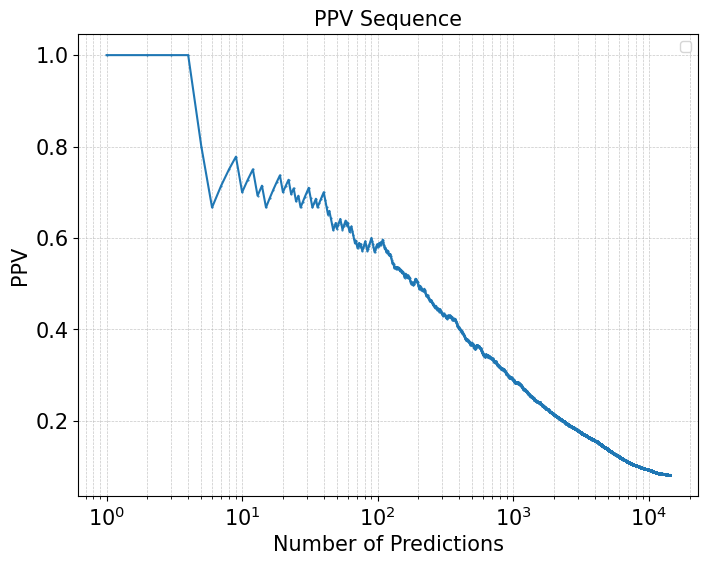

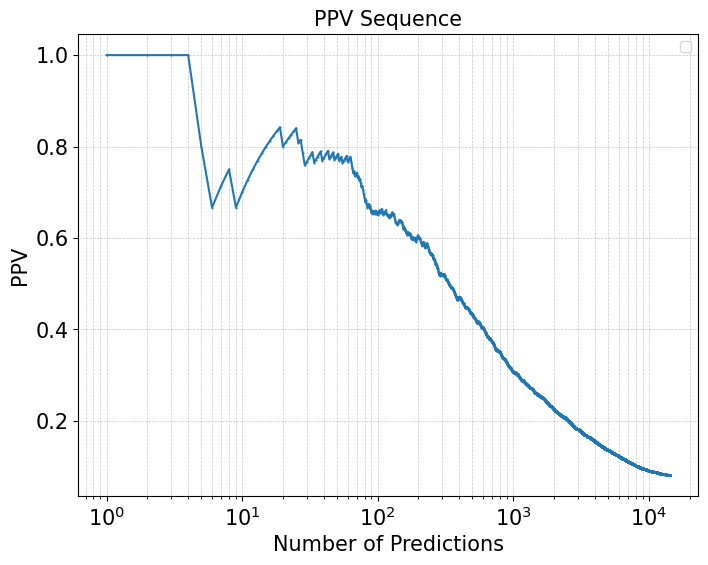

In [12]:
labels = ["48"]
figtitle = "PPV Sequence"

graphPPV(PPVs32_23_w_mask,labels,figtitle, fig_size=(8, 6))
graphPPV(PPVs32_23_wo_mask,labels,figtitle, fig_size=(8, 6))


176


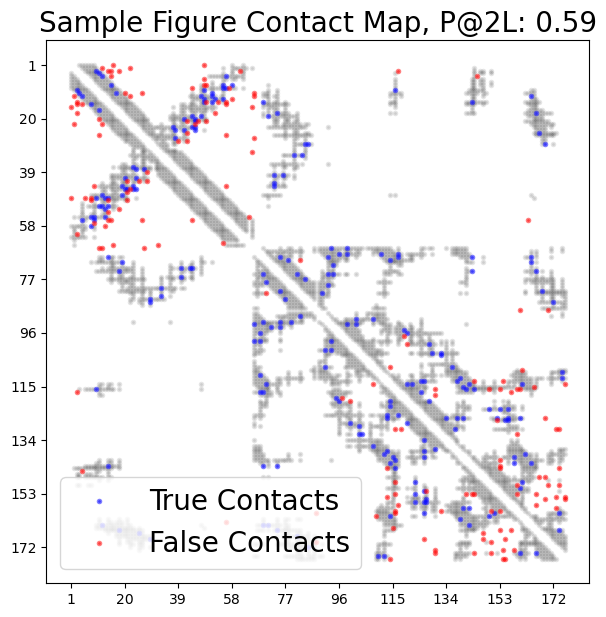

In [ ]:
#N = 100  # Number of top predictions to consider
figurename = 'Sample Figure'
ticks = np.arange(1, N+1, 19)  # Example tick positions
num = int(N)
print(N)

# Call the contact_plot function
fake32_23_w_mask = contact_plot(ranking32_23_w_mask, structfile, 200, figurename, ticks=ticks, min_separation=2, cutoff=10.0, N="2L")

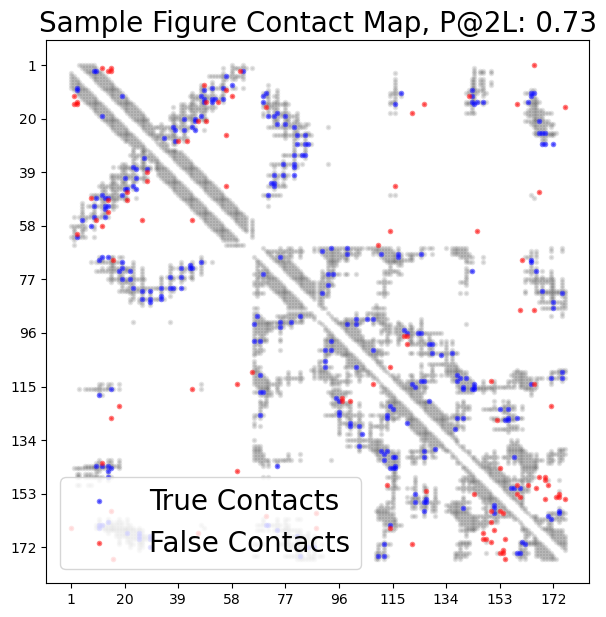

In [17]:
fake32_23_wo_mask = contact_plot(ranking32_23_wo_mask, structfile, 200, figurename, ticks=ticks, min_separation=2, cutoff=10.0, N="2L")

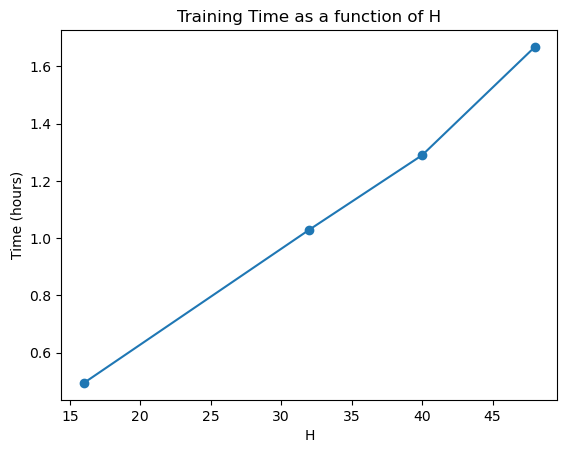

In [29]:
#plot time as a function of H
import matplotlib.pyplot as plt
import numpy as np

H = [16, 32, 40, 48]
times = [1780.777393579483, 3707.0626146793365, 4642.449977874756, 6003.049374341965] #seconds
#transform in hours and minutes
times = [t/3600 for t in times]

plt.plot(H, times, 'o-')
plt.xlabel('H')
plt.ylabel('Time (hours)')
plt.title('Training Time as a function of H')
plt.show()




## Provo a mettere lo Z nelle energie##

## 32 23 W mask##

In [20]:
from CODE.AttentionDCA_python.src.utils import quickread
Z, W = quickread(filename)
W = W / W.sum()
q = int(Z.max()) + 1
N, M = Z.shape
Q, K,V = Q32_23_w_mask, K32_23_w_mask, V32_23_w_mask
device = 'cpu'
e = torch.einsum('hdi,hdj->ijh', Q,K)  # Shape: (N, N, H)
sf = torch.zeros(N, N, H, device=device)
for h in range(H):
    sf_domain = torch.softmax(e[:, :, h], dim=1)
    #sf = sf.clone()
    sf[:, :, h] = sf_domain
sf = sf.permute(2, 0, 1)

Total sequences read: 15539
Sequences after filtering: 15539
Sampling 100000 pairs out of 120722491 total pairs.
Mean fraction of identical positions (sampled): 0.3124654171960262
Computed theta: 0.3891630667201607


100%|██████████| 15539/15539 [00:23<00:00, 662.62it/s] 


3515.9189003436304


In [53]:
fake32_23_w_mask

[(150, 170),
 (147, 167),
 (97, 119),
 (21, 46),
 (1, 16),
 (153, 159),
 (3, 61),
 (14, 53),
 (21, 49),
 (155, 176),
 (15, 56),
 (3, 15),
 (22, 45),
 (11, 66),
 (144, 153),
 (2, 12),
 (28, 42),
 (5, 15),
 (150, 159),
 (21, 42),
 (127, 152),
 (26, 56),
 (147, 169),
 (144, 174),
 (116, 149),
 (143, 153),
 (27, 66),
 (88, 160),
 (3, 14),
 (14, 56),
 (100, 120),
 (114, 176),
 (25, 42),
 (13, 58),
 (32, 65),
 (115, 165),
 (1, 48),
 (8, 48),
 (117, 157),
 (155, 169),
 (109, 161),
 (70, 82),
 (12, 22),
 (141, 153),
 (88, 170),
 (157, 166),
 (14, 49),
 (116, 160),
 (9, 57),
 (154, 173),
 (11, 20),
 (9, 44),
 (116, 130),
 (3, 18),
 (116, 153),
 (3, 117),
 (158, 173),
 (11, 26),
 (28, 39),
 (113, 144),
 (6, 48),
 (126, 169),
 (16, 65),
 (153, 166),
 (116, 159),
 (2, 22),
 (118, 130),
 (55, 64),
 (108, 114),
 (130, 174),
 (12, 66),
 (44, 56),
 (56, 163),
 (18, 52),
 (150, 174),
 (154, 176),
 (132, 159),
 (113, 154),
 (8, 49),
 (130, 173),
 (5, 145)]

In [54]:
fake32_23_wo_mask

[(150, 170),
 (21, 46),
 (147, 167),
 (100, 120),
 (97, 119),
 (28, 42),
 (155, 176),
 (21, 49),
 (14, 53),
 (127, 152),
 (155, 169),
 (154, 160),
 (150, 159),
 (147, 169),
 (28, 39),
 (46, 167),
 (150, 163),
 (15, 159),
 (12, 142),
 (65, 110),
 (97, 120),
 (2, 12),
 (153, 174),
 (8, 48),
 (88, 160),
 (144, 153),
 (26, 56),
 (3, 61),
 (14, 49),
 (70, 161),
 (154, 173),
 (88, 165),
 (108, 114),
 (3, 14),
 (153, 159),
 (154, 174),
 (44, 56),
 (60, 145),
 (151, 166),
 (3, 15),
 (44, 116),
 (2, 15),
 (18, 122),
 (16, 176),
 (122, 171),
 (114, 165),
 (113, 150),
 (60, 114),
 (16, 70),
 (1, 165),
 (148, 169),
 (15, 126),
 (12, 58),
 (10, 56)]

In [24]:
i, j = 149, 169

In [40]:
def get_scalar_contributions(i, j, Z, V, sf, H, top_k = 5):
    if isinstance(Z, np.ndarray):
        Z = torch.from_numpy(Z).to(device).long()  # Shape: (N, M)
    elif isinstance(Z, torch.Tensor):
        Z = Z.to(device).long()
    else:
        raise TypeError("Z must be a NumPy array or a PyTorch tensor.")
    # Step 1: Extract amino acid indices at position j for all sequences
    aa_j = Z[j, :]  # Shape: (M,)
    #aa_j = aa_j.long()  # Ensure type is long for indexing

    # Step 2: Gather the corresponding V vectors based on aa_j indices
    # V has shape (H, q, q)
    # Expand aa_j for each head
    aa_j_expanded = aa_j.unsqueeze(0).expand(H, M)  # Shape: (H, M)

    # Gather V vectors
    # V_selected will have shape (H, M, q)
    V_selected = V.gather(1, aa_j_expanded.unsqueeze(-1).expand(-1, -1, V.size(-1)))  # Shape: (H, M, q)

    # Step 3: Extract attention weights for contact (i, j) across all heads
    # sf has shape (H, L, L) where L = N = 176
    attention_weights = sf[:, i, j]  # Shape: (H,)

    # Step 4: Compute contributions per sequence
    attention_weights_expanded = attention_weights.view(H, 1, 1)  # Shape: (H, 1, 1)
    contributions = attention_weights_expanded * V_selected  # Shape: (H, M, q)

    # Step 5: Aggregate contributions across all heads
    mat_ene = contributions.sum(dim=0)  # Shape: (M, q)

    # Step 6: (Optional) Aggregate contributions across amino acid dimensions
    scalar_contributions = mat_ene.sum(dim=1)  # Shape: (M,)

    # Step 7: Identify top contributing sequences
    
    top_contributors = torch.argsort(scalar_contributions, descending=True)[:top_k] 
    return scalar_contributions, top_contributors


In [ ]:
# Step 5: Visualize contributions (optional)
import matplotlib.pyplot as plt
top_k = 10
scalar_contributions, top_contributors = get_scalar_contributions(i, j, Z, V, sf, H, top_k= top_k)
scalar_contributions_cpu = scalar_contributions.detach().cpu().numpy()
plt.figure(figsize=(12, 6))
plt.bar(range(M), scalar_contributions_cpu, color='skyblue')
plt.xlabel('Sequence Index')
plt.ylabel('Contribution to J_ij')
plt.title(f'Per-Sequence Contributions to Energy J_ij at Contact ({i}, {j})')
plt.show()

In [46]:
top_contributors

tensor([ 2839,  2165,  2164,  7104,  3867,  3879,   830, 15259, 15260,  2163])

In [ ]:
import numpy as np
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
from CODE.AttentionDCA_python.src.utils import read_fasta_alignment, remove_duplicate_sequences

# Assuming you have the following functions already defined:
# - read_fasta_alignment()
# - remove_duplicate_sequences()
# - compute_theta_large() and related functions
# - ReadFasta()
# - quickread()

def identify_top_contributors(scalar_contributions, top_k=5):
    """
    Identify the top_k contributing sequences based on scalar contributions.

    Parameters:
    - scalar_contributions: numpy array of shape (M,), scalar contributions for each sequence.
    - top_k: int, number of top contributors to identify.

    Returns:
    - top_indices: list of int, indices of top contributing sequences.

    """
    print(scalar_contributions)
    #top_contribution = torch.argsort(scalar_contributions, descending=True)[:top_k]
    #take the indices of the top k values in scalar_contributions, being it a torch tenso


    top_indices = torch.argsort(scalar_contributions, descending=True)[:top_k] 

    #top_indices = np.argsort(scalar_contributions)[-top_k:][::-1]
    return top_indices

def get_unique_sequences(filename, max_gap_fraction=0.9, verbose=True):
    """
    Retrieve unique amino acid sequences in the same order as the columns of Z.

    Parameters:
    - filename: str, path to the original FASTA file.
    - max_gap_fraction: float, maximum allowed fraction of gaps in a sequence.
    - verbose: bool, whether to print status messages.

    Returns:
    - unique_sequences: list of str, unique amino acid sequences.
    """
    # Read the alignment matrix Z and get the list of filtered sequences
    Z, filtered_sequences = read_fasta_alignment(filename, max_gap_fraction, verbose=verbose, return_filtered=True)
    
    # Remove duplicate sequences and get their indices
    Z_unique, unique_indices = remove_duplicate_sequences(Z, verbose=verbose)
    
    # Extract unique sequences based on the unique_indices
    unique_sequences = [filtered_sequences[idx] for idx in unique_indices]
    
    return unique_sequences

def get_top_sequences(unique_sequences, top_indices):
    """
    Retrieve the top contributing sequences based on their indices.

    Parameters:
    - unique_sequences: list of str, unique amino acid sequences in order.
    - top_indices: list or array of int, indices of top contributing sequences.

    Returns:
    - top_sequences: list of str, top contributing amino acid sequences.
    """
    top_sequences = [unique_sequences[idx] for idx in top_indices]
    return top_sequences

def write_top_contributors_fasta(top_sequences, output_filename="top_contributors.fasta"):
    """
    Write top contributing sequences to a separate FASTA file with generic headers.

    Parameters:
    - top_sequences: list of str, amino acid sequences.
    - output_filename: str, name of the output FASTA file.
    """
    records = []
    for idx, seq in enumerate(top_sequences, start=1):
        # Ensure seq is a string
        if not isinstance(seq, str):
            print(f"Warning: Sequence at index {idx} is not a string. Attempting to convert.")
            try:
                seq = str(seq)
            except Exception as e:
                print(f"Error converting sequence at index {idx}: {e}")
                continue  # Skip this sequence
        
        # Create a SeqRecord
        record = SeqRecord(Seq(seq), id=f"Top_Contrib_{idx}", description="Top Contributor")
        records.append(record)
    
    # Write to FASTA
    try:
        SeqIO.write(records, output_filename, "fasta")
        print(f"Top contributing sequences have been written to {output_filename}.")
    except Exception as e:
        print(f"Error writing FASTA file: {e}")

def create_processed_fasta(original_fasta, top_sequences, output_processed_fasta="processed_original.fasta"):
    """
    Create a processed FASTA file excluding the top contributing sequences.

    Parameters:
    - original_fasta: str, path to the original FASTA file.
    - top_sequences: list of str, top contributing amino acid sequences.
    - output_processed_fasta: str, name of the output processed FASTA file.
    """
    # Convert top_sequences to a set for faster lookup
    top_sequences_set = set(top_sequences)
    
    # Read all sequences from the original FASTA
    sequences = []
    names = []
    def open_fasta(filename):
        if filename.endswith('.gz'):
            return gzip.open(filename, 'rt')
        else:
            return open(filename, 'r')
    
    with open_fasta(original_fasta) as f:
        seq_name = None
        seq_lines = []
        for line in f:
            line = line.strip()
            if not line:
                continue
            if line.startswith('>'):
                if seq_name is not None:
                    sequences.append(''.join(seq_lines))
                    names.append(seq_name)
                seq_name = line[1:].strip()
                seq_lines = []
            else:
                seq_lines.append(line.upper())
        if seq_name is not None:
            sequences.append(''.join(seq_lines))
            names.append(seq_name)
    
    # Filter sequences based on max_gap_fraction as in read_fasta_alignment
    first_seq = sequences[0]
    indices = [i for i, c in enumerate(first_seq) if c != '.' and not c.islower()]
    fseqlen = len(indices)
    
    filtered_sequences = []
    filtered_names = []
    for name, seq in zip(names, sequences):
        ngaps = sum(1 for idx in indices if seq[idx] == '-')
        gap_fraction = ngaps / fseqlen
        if gap_fraction <= 0.9:
            filtered_sequences.append(seq)
            filtered_names.append(name)
        else:
            print(f"Sequence {name} excluded due to high gap fraction ({gap_fraction:.2f}).")
    
    # Remove duplicates to align with Z_unique
    seen = set()
    unique_filtered_sequences = []
    for seq in filtered_sequences:
        if seq not in seen:
            seen.add(seq)
            unique_filtered_sequences.append(seq)
    
    # Exclude top sequences
    processed_sequences = [seq for seq in unique_filtered_sequences if seq not in top_sequences_set]
    
    # Write to processed FASTA
    records = []
    for idx, seq in enumerate(processed_sequences, start=1):
        record = SeqRecord(Seq(seq), id=f"Processed_{idx}", description="")
        records.append(record)
    
    try:
        SeqIO.write(records, output_processed_fasta, "fasta")
        print(f"Processed FASTA (excluding top contributors) has been written to {output_processed_fasta}.")
    except Exception as e:
        print(f"Error writing processed FASTA file: {e}")

def verify_top_contributors(original_fasta, top_sequences):
    """
    Verifies that the top contributing sequences are present in the original FASTA.

    Parameters:
    - original_fasta: str, path to the original FASTA file.
    - top_sequences: list of str, amino acid sequences of top contributors.
    """
    # Read all sequences from the original FASTA
    Z, filtered_names, filtered_sequences = read_fasta_alignment(original_fasta, max_gap_fraction=0.9, verbose=False)
    Z_unique, unique_indices = remove_duplicate_sequences(Z, verbose=False)
    unique_sequences = [filtered_sequences[idx] for idx in unique_indices]
    
    # Create a set for faster lookup
    unique_sequences_set = set(unique_sequences)
    
    # Verify each top contributing sequence
    for idx, seq in enumerate(top_sequences, start=1):
        if seq in unique_sequences_set:
            print(f"Top contributor {idx} is present in the original FASTA.")
        else:
            print(f"Top contributor {idx} is NOT present in the original FASTA.")


# ----- Step 1: Read and Process the FASTA File -----
fastafile = filename  # Replace with your actual FASTA file path
e = torch.einsum('hdi,hdj->ijh', Q32_23, K32_23)  # Shape: (N, N, H)
sf = torch.zeros(N, N, H, device=device)
for h in range(H):
    sf_domain = torch.softmax(e[:, :, h], dim=1)  
    #sf = sf.clone()
    sf[:, :, h] = sf_domain
sf = sf.permute(2, 0, 1)

# Read and process the FASTA to get unique sequences
unique_sequences = get_unique_sequences(fastafile, max_gap_fraction=0.9, verbose=True)
print(f"Total unique sequences: {len(unique_sequences)}")

# ----- Step 2: Perform Training and Obtain scalar_contributions -----
# This step depends on your specific model and training loop.
# After training, you should have the `scalar_contributions` array.

# For demonstration, let's assume scalar_contributions is already computed
# Replace the following line with your actual scalar_contributions computation
i, j = 149, 169
scalar_contributions, _ = get_scalar_contributions(i, j , Z, V , sf, H)  # Placeholder: Random contributions

# ----- Step 3: Identify Top Contributing Sequences -----
  # Number of top contributors to extract
top_indices = identify_top_contributors(scalar_contributions, top_k=top_k)
print(f"Top {top_k} contributing sequence indices: {top_indices}")

# ----- Step 4: Retrieve Top Contributing Sequences -----
top_sequences = get_top_sequences(unique_sequences, top_indices)
print("Top contributing sequences:")
for idx, seq in enumerate(top_sequences, start=1):
    print(f"Sequence {idx}: {seq}")

# ----- Step 5: Write Top Contributing Sequences to a Separate FASTA File -----
write_top_contributors_fasta(top_sequences, output_filename="top_contributors.fasta")

# ----- Step 6: Create a Processed FASTA File Excluding Top Contributors -----
create_processed_fasta(
    original_fasta=fastafile,
    #unique_sequences=unique_sequences,
    top_sequences=top_sequences,
    output_processed_fasta="processed_original.fasta"
)

# ----- Step 7: Verification -----
#verify_top_contributors(fastafile, top_sequences)




## 32 23 wo mask##

In [ ]:
N, M = Z.shape
Q, K,V = Q32_23_wo_mask, K32_23_wo_mask, V32_23_wo_mask
device = 'cpu'
e = torch.einsum('hdi,hdj->ijh', Q,K)  # Shape: (N, N, H)
sf = torch.zeros(N, N, H, device=device)
for h in range(H):
    sf_domain = torch.softmax(e[:, :, h], dim=1)
    #sf = sf.clone()
    sf[:, :, h] = sf_domain
sf = sf.permute(2, 0, 1)
i, j = 149, 169
def get_scalar_contributions(i, j, Z, V, sf, H, top_k = 5):
    if isinstance(Z, np.ndarray):
        Z = torch.from_numpy(Z).to(device).long()  # Shape: (N, M)
    elif isinstance(Z, torch.Tensor):
        Z = Z.to(device).long()
    else:
        raise TypeError("Z must be a NumPy array or a PyTorch tensor.")
    # Step 1: Extract amino acid indices at position j for all sequences
    aa_j = Z[j, :]  # Shape: (M,)
    #aa_j = aa_j.long()  # Ensure type is long for indexing

    # Step 2: Gather the corresponding V vectors based on aa_j indices
    # V has shape (H, q, q)
    # Expand aa_j for each head
    aa_j_expanded = aa_j.unsqueeze(0).expand(H, M)  # Shape: (H, M)

    # Gather V vectors
    # V_selected will have shape (H, M, q)
    V_selected = V.gather(1, aa_j_expanded.unsqueeze(-1).expand(-1, -1, V.size(-1)))  # Shape: (H, M, q)

    # Step 3: Extract attention weights for contact (i, j) across all heads
    # sf has shape (H, L, L) where L = N = 176
    attention_weights = sf[:, i, j]  # Shape: (H,)

    # Step 4: Compute contributions per sequence
    attention_weights_expanded = attention_weights.view(H, 1, 1)  # Shape: (H, 1, 1)
    contributions = attention_weights_expanded * V_selected  # Shape: (H, M, q)

    # Step 5: Aggregate contributions across all heads
    mat_ene = contributions.sum(dim=0)  # Shape: (M, q)

    # Step 6: (Optional) Aggregate contributions across amino acid dimensions
    scalar_contributions = mat_ene.sum(dim=1)  # Shape: (M,)

    # Step 7: Identify top contributing sequences
    
    top_contributors = torch.argsort(scalar_contributions, descending=True)[:top_k] 
    return scalar_contributions, top_contributors

# Step 5: Visualize contributions (optional)
import matplotlib.pyplot as plt
top_k = 10
scalar_contributions, top_contributors = get_scalar_contributions(i, j, Z, V, sf, H, top_k= top_k)
scalar_contributions_cpu = scalar_contributions.detach().cpu().numpy()



Total sequences read: 15539
Sequences after filtering: 15539
Sampling 100000 pairs out of 120722491 total pairs.
Mean fraction of identical positions (sampled): 0.3125804545454546
Computed theta: 0.389019845072614


100%|██████████| 15539/15539 [00:27<00:00, 571.05it/s] 


3515.9189003436304


In [ ]:
import numpy as np
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
from CODE.AttentionDCA_python.src.utils import read_fasta_alignment, remove_duplicate_sequences


def identify_top_contributors(scalar_contributions, top_k=5):
    """
    Identify the top_k contributing sequences based on scalar contributions.

    Parameters:
    - scalar_contributions: numpy array of shape (M,), scalar contributions for each sequence.
    - top_k: int, number of top contributors to identify.

    Returns:
    - top_indices: list of int, indices of top contributing sequences.

    """
    print(scalar_contributions)
    #top_contribution = torch.argsort(scalar_contributions, descending=True)[:top_k]
    #take the indices of the top k values in scalar_contributions, being it a torch tenso


    top_indices = torch.argsort(scalar_contributions, descending=True)[:top_k] 

    #top_indices = np.argsort(scalar_contributions)[-top_k:][::-1]
    return top_indices

def get_unique_sequences(filename, max_gap_fraction=0.9, verbose=True):
    """
    Retrieve unique amino acid sequences in the same order as the columns of Z.

    Parameters:
    - filename: str, path to the original FASTA file.
    - max_gap_fraction: float, maximum allowed fraction of gaps in a sequence.
    - verbose: bool, whether to print status messages.

    Returns:
    - unique_sequences: list of str, unique amino acid sequences.
    """
    # Read the alignment matrix Z and get the list of filtered sequences
    Z, filtered_sequences = read_fasta_alignment(filename, max_gap_fraction, verbose=verbose, return_filtered=True)
    
    # Remove duplicate sequences and get their indices
    Z_unique, unique_indices = remove_duplicate_sequences(Z, verbose=verbose)
    
    # Extract unique sequences based on the unique_indices
    unique_sequences = [filtered_sequences[idx] for idx in unique_indices]
    
    return unique_sequences

def get_top_sequences(unique_sequences, top_indices):
    """
    Retrieve the top contributing sequences based on their indices.

    Parameters:
    - unique_sequences: list of str, unique amino acid sequences in order.
    - top_indices: list or array of int, indices of top contributing sequences.

    Returns:
    - top_sequences: list of str, top contributing amino acid sequences.
    """
    top_sequences = [unique_sequences[idx] for idx in top_indices]
    return top_sequences

def write_top_contributors_fasta(top_sequences, output_filename="top_contributors.fasta"):
    """
    Write top contributing sequences to a separate FASTA file with generic headers.

    Parameters:
    - top_sequences: list of str, amino acid sequences.
    - output_filename: str, name of the output FASTA file.
    """
    records = []
    for idx, seq in enumerate(top_sequences, start=1):
        # Ensure seq is a string
        if not isinstance(seq, str):
            print(f"Warning: Sequence at index {idx} is not a string. Attempting to convert.")
            try:
                seq = str(seq)
            except Exception as e:
                print(f"Error converting sequence at index {idx}: {e}")
                continue  # Skip this sequence
        
        # Create a SeqRecord
        record = SeqRecord(Seq(seq), id=f"Top_Contrib_{idx}", description="Top Contributor")
        records.append(record)
    
    # Write to FASTA
    try:
        SeqIO.write(records, output_filename, "fasta")
        print(f"Top contributing sequences have been written to {output_filename}.")
    except Exception as e:
        print(f"Error writing FASTA file: {e}")

def create_processed_fasta(original_fasta, top_sequences, output_processed_fasta="processed_original.fasta"):
    """
    Create a processed FASTA file excluding the top contributing sequences.

    Parameters:
    - original_fasta: str, path to the original FASTA file.
    - top_sequences: list of str, top contributing amino acid sequences.
    - output_processed_fasta: str, name of the output processed FASTA file.
    """
    # Convert top_sequences to a set for faster lookup
    top_sequences_set = set(top_sequences)
    
    # Read all sequences from the original FASTA
    sequences = []
    names = []
    def open_fasta(filename):
        if filename.endswith('.gz'):
            return gzip.open(filename, 'rt')
        else:
            return open(filename, 'r')
    
    with open_fasta(original_fasta) as f:
        seq_name = None
        seq_lines = []
        for line in f:
            line = line.strip()
            if not line:
                continue
            if line.startswith('>'):
                if seq_name is not None:
                    sequences.append(''.join(seq_lines))
                    names.append(seq_name)
                seq_name = line[1:].strip()
                seq_lines = []
            else:
                seq_lines.append(line.upper())
        if seq_name is not None:
            sequences.append(''.join(seq_lines))
            names.append(seq_name)
    
    # Filter sequences based on max_gap_fraction as in read_fasta_alignment
    first_seq = sequences[0]
    indices = [i for i, c in enumerate(first_seq) if c != '.' and not c.islower()]
    fseqlen = len(indices)
    
    filtered_sequences = []
    filtered_names = []
    for name, seq in zip(names, sequences):
        ngaps = sum(1 for idx in indices if seq[idx] == '-')
        gap_fraction = ngaps / fseqlen
        if gap_fraction <= 0.9:
            filtered_sequences.append(seq)
            filtered_names.append(name)
        else:
            print(f"Sequence {name} excluded due to high gap fraction ({gap_fraction:.2f}).")
    
    # Remove duplicates to align with Z_unique
    seen = set()
    unique_filtered_sequences = []
    for seq in filtered_sequences:
        if seq not in seen:
            seen.add(seq)
            unique_filtered_sequences.append(seq)
    
    # Exclude top sequences
    processed_sequences = [seq for seq in unique_filtered_sequences if seq not in top_sequences_set]
    
    # Write to processed FASTA
    records = []
    for idx, seq in enumerate(processed_sequences, start=1):
        record = SeqRecord(Seq(seq), id=f"Processed_{idx}", description="")
        records.append(record)
    
    try:
        SeqIO.write(records, output_processed_fasta, "fasta")
        print(f"Processed FASTA (excluding top contributors) has been written to {output_processed_fasta}.")
    except Exception as e:
        print(f"Error writing processed FASTA file: {e}")

def verify_top_contributors(original_fasta, top_sequences):
    """
    Verifies that the top contributing sequences are present in the original FASTA.

    Parameters:
    - original_fasta: str, path to the original FASTA file.
    - top_sequences: list of str, amino acid sequences of top contributors.
    """
    # Read all sequences from the original FASTA
    Z, filtered_names, filtered_sequences = read_fasta_alignment(original_fasta, max_gap_fraction=0.9, verbose=False)
    Z_unique, unique_indices = remove_duplicate_sequences(Z, verbose=False)
    unique_sequences = [filtered_sequences[idx] for idx in unique_indices]
    
    # Create a set for faster lookup
    unique_sequences_set = set(unique_sequences)
    
    # Verify each top contributing sequence
    for idx, seq in enumerate(top_sequences, start=1):
        if seq in unique_sequences_set:
            print(f"Top contributor {idx} is present in the original FASTA.")
        else:
            print(f"Top contributor {idx} is NOT present in the original FASTA.")


# ----- Step 1: Read and Process the FASTA File -----
fastafile = filename  # Replace with your actual FASTA file path
e = torch.einsum('hdi,hdj->ijh', Q32_23, K32_23)  # Shape: (N, N, H)
sf = torch.zeros(N, N, H, device=device)
for h in range(H):
    sf_domain = torch.softmax(e[:, :, h], dim=1)  
    #sf = sf.clone()
    sf[:, :, h] = sf_domain
sf = sf.permute(2, 0, 1)

# Read and process the FASTA to get unique sequences
unique_sequences = get_unique_sequences(fastafile, max_gap_fraction=0.9, verbose=True)
print(f"Total unique sequences: {len(unique_sequences)}")

# ----- Step 2: Perform Training and Obtain scalar_contributions -----
# This step depends on your specific model and training loop.
# After training, you should have the `scalar_contributions` array.

# For demonstration, let's assume scalar_contributions is already computed
# Replace the following line with your actual scalar_contributions computation
i, j = 149, 169
scalar_contributions, _ = get_scalar_contributions(i, j , Z, V , sf, H)  # Placeholder: Random contributions

# ----- Step 3: Identify Top Contributing Sequences -----
  # Number of top contributors to extract
top_indices = identify_top_contributors(scalar_contributions, top_k=top_k)
print(f"Top {top_k} contributing sequence indices: {top_indices}")

# ----- Step 4: Retrieve Top Contributing Sequences -----
top_sequences = get_top_sequences(unique_sequences, top_indices)
print("Top contributing sequences:")
for idx, seq in enumerate(top_sequences, start=1):
    print(f"Sequence {idx}: {seq}")

# ----- Step 5: Write Top Contributing Sequences to a Separate FASTA File -----
write_top_contributors_fasta(top_sequences, output_filename="top_contributors.fasta")

# ----- Step 6: Create a Processed FASTA File Excluding Top Contributors -----
create_processed_fasta(
    original_fasta=fastafile,
    #unique_sequences=unique_sequences,
    top_sequences=top_sequences,
    output_processed_fasta="processed_original.fasta"
)

# ----- Step 7: Verification -----
#verify_top_contributors(fastafile, top_sequences)




Total sequences read: 15539
Sequences after filtering: 15539
Removing duplicate sequences...
Done: 15539 -> 15539 sequences after removing duplicates.
Total unique sequences: 15539
tensor([ 0.4937,  0.3677, -0.3402,  ...,  0.3677,  0.3677,  0.3677])
Top 10 contributing sequence indices: tensor([ 1843, 11541,  2103, 13447, 10563,  2559,  2557,  6524,  6523, 11568])
Top contributing sequences:
Sequence 1: ('ECBG_03050_HK_Classic|Enterococcus_casseliflavus_EC20|Pair_ECBG_03049//ECBG_03049_RR_OmpR|Enterococcus_casseliflavus_EC20|Pair_ECBG_03050', '---LLTTSIVHDLNNFLTPMIGHLQLLIEHDEVLVEDLQEVCKAAEKGKELSSNVLRFSKLES-ILIVDDDPAIRRLIWKSLQSTGI-LIYQTDSVEKTIAINSRVSFDLFLLDISLEHNDGYHLAQLIREENPTVPIVFLSGKSDEKDMINGYEIGADHYITKPFSPALLKAQI-')
Sequence 2: ('CLJ_B2173_HK_Classic|Clostridium_botulinum_Ba4_str._657|Pair_CLJ_B2174//CLJ_B2174_RR_OmpR|Clostridium_botulinum_Ba4_str._657|Pair_CLJ_B2173', '-RREFIATISHELKTPITILKGQIEGMLSY-KDRNKYLKRNLEVLNDMEYIVKETLEISKLES-ILVVEDDFDIQTIISEVLKESGY-LVEEATDGLMAVEMFREGNFDLIILD

## 32 23 OLD##

In [ ]:

N, M = Z.shape
Q, K,V = Q32_23, K32_23, V32_23
device = 'cpu'
e = torch.einsum('hdi,hdj->ijh', Q,K)  # Shape: (N, N, H)
sf = torch.zeros(N, N, H, device=device)
for h in range(H):
    sf_domain = torch.softmax(e[:, :, h], dim=1)
    #sf = sf.clone()
    sf[:, :, h] = sf_domain
sf = sf.permute(2, 0, 1)
i, j = 149, 169
def get_scalar_contributions(i, j, Z, V, sf, H, top_k = 5):
    if isinstance(Z, np.ndarray):
        Z = torch.from_numpy(Z).to(device).long()  # Shape: (N, M)
    elif isinstance(Z, torch.Tensor):
        Z = Z.to(device).long()
    else:
        raise TypeError("Z must be a NumPy array or a PyTorch tensor.")
    # Step 1: Extract amino acid indices at position j for all sequences
    aa_j = Z[j, :]  # Shape: (M,)
    #aa_j = aa_j.long()  # Ensure type is long for indexing

    # Step 2: Gather the corresponding V vectors based on aa_j indices
    # V has shape (H, q, q)
    # Expand aa_j for each head
    aa_j_expanded = aa_j.unsqueeze(0).expand(H, M)  # Shape: (H, M)

    # Gather V vectors
    # V_selected will have shape (H, M, q)
    V_selected = V.gather(1, aa_j_expanded.unsqueeze(-1).expand(-1, -1, V.size(-1)))  # Shape: (H, M, q)

    # Step 3: Extract attention weights for contact (i, j) across all heads
    # sf has shape (H, L, L) where L = N = 176
    attention_weights = sf[:, i, j]  # Shape: (H,)

    # Step 4: Compute contributions per sequence
    attention_weights_expanded = attention_weights.view(H, 1, 1)  # Shape: (H, 1, 1)
    contributions = attention_weights_expanded * V_selected  # Shape: (H, M, q)

    # Step 5: Aggregate contributions across all heads
    mat_ene = contributions.sum(dim=0)  # Shape: (M, q)

    # Step 6: (Optional) Aggregate contributions across amino acid dimensions
    scalar_contributions = mat_ene.sum(dim=1)  # Shape: (M,)

    # Step 7: Identify top contributing sequences
    
    top_contributors = torch.argsort(scalar_contributions, descending=True)[:top_k] 
    return scalar_contributions, top_contributors

# Step 5: Visualize contributions (optional)
import matplotlib.pyplot as plt
top_k = 5
scalar_contributions, top_contributors = get_scalar_contributions(i, j, Z, V, sf, H, top_k= top_k)
scalar_contributions_cpu = scalar_contributions.detach().cpu().numpy()


import numpy as np
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
from CODE.AttentionDCA_python.src.utils import read_fasta_alignment, remove_duplicate_sequences

# Assuming you have the following functions already defined:
# - read_fasta_alignment()
# - remove_duplicate_sequences()
# - compute_theta_large() and related functions
# - ReadFasta()
# - quickread()

def identify_top_contributors(scalar_contributions, top_k=5):
    """
    Identify the top_k contributing sequences based on scalar contributions.

    Parameters:
    - scalar_contributions: numpy array of shape (M,), scalar contributions for each sequence.
    - top_k: int, number of top contributors to identify.

    Returns:
    - top_indices: list of int, indices of top contributing sequences.

    """
    print(scalar_contributions)
    #top_contribution = torch.argsort(scalar_contributions, descending=True)[:top_k]
    #take the indices of the top k values in scalar_contributions, being it a torch tenso


    top_indices = torch.argsort(scalar_contributions, descending=True)[:top_k] 

    #top_indices = np.argsort(scalar_contributions)[-top_k:][::-1]
    return top_indices

def get_unique_sequences(filename, max_gap_fraction=0.9, verbose=True):
    """
    Retrieve unique amino acid sequences in the same order as the columns of Z.

    Parameters:
    - filename: str, path to the original FASTA file.
    - max_gap_fraction: float, maximum allowed fraction of gaps in a sequence.
    - verbose: bool, whether to print status messages.

    Returns:
    - unique_sequences: list of str, unique amino acid sequences.
    """
    # Read the alignment matrix Z and get the list of filtered sequences
    Z, filtered_sequences = read_fasta_alignment(filename, max_gap_fraction, verbose=verbose, return_filtered=True)
    
    # Remove duplicate sequences and get their indices
    Z_unique, unique_indices = remove_duplicate_sequences(Z, verbose=verbose)
    
    # Extract unique sequences based on the unique_indices
    unique_sequences = [filtered_sequences[idx] for idx in unique_indices]
    
    return unique_sequences

def get_top_sequences(unique_sequences, top_indices):
    """
    Retrieve the top contributing sequences based on their indices.

    Parameters:
    - unique_sequences: list of str, unique amino acid sequences in order.
    - top_indices: list or array of int, indices of top contributing sequences.

    Returns:
    - top_sequences: list of str, top contributing amino acid sequences.
    """
    top_sequences = [unique_sequences[idx] for idx in top_indices]
    return top_sequences

def write_top_contributors_fasta(top_sequences, output_filename="top_contributors.fasta"):
    """
    Write top contributing sequences to a separate FASTA file with generic headers.

    Parameters:
    - top_sequences: list of str, amino acid sequences.
    - output_filename: str, name of the output FASTA file.
    """
    records = []
    for idx, seq in enumerate(top_sequences, start=1):
        # Ensure seq is a string
        if not isinstance(seq, str):
            print(f"Warning: Sequence at index {idx} is not a string. Attempting to convert.")
            try:
                seq = str(seq)
            except Exception as e:
                print(f"Error converting sequence at index {idx}: {e}")
                continue  # Skip this sequence
        
        # Create a SeqRecord
        record = SeqRecord(Seq(seq), id=f"Top_Contrib_{idx}", description="Top Contributor")
        records.append(record)
    
    # Write to FASTA
    try:
        SeqIO.write(records, output_filename, "fasta")
        print(f"Top contributing sequences have been written to {output_filename}.")
    except Exception as e:
        print(f"Error writing FASTA file: {e}")

def create_processed_fasta(original_fasta, top_sequences, output_processed_fasta="processed_original.fasta"):
    """
    Create a processed FASTA file excluding the top contributing sequences.

    Parameters:
    - original_fasta: str, path to the original FASTA file.
    - top_sequences: list of str, top contributing amino acid sequences.
    - output_processed_fasta: str, name of the output processed FASTA file.
    """
    # Convert top_sequences to a set for faster lookup
    top_sequences_set = set(top_sequences)
    
    # Read all sequences from the original FASTA
    sequences = []
    names = []
    def open_fasta(filename):
        if filename.endswith('.gz'):
            return gzip.open(filename, 'rt')
        else:
            return open(filename, 'r')
    
    with open_fasta(original_fasta) as f:
        seq_name = None
        seq_lines = []
        for line in f:
            line = line.strip()
            if not line:
                continue
            if line.startswith('>'):
                if seq_name is not None:
                    sequences.append(''.join(seq_lines))
                    names.append(seq_name)
                seq_name = line[1:].strip()
                seq_lines = []
            else:
                seq_lines.append(line.upper())
        if seq_name is not None:
            sequences.append(''.join(seq_lines))
            names.append(seq_name)
    
    # Filter sequences based on max_gap_fraction as in read_fasta_alignment
    first_seq = sequences[0]
    indices = [i for i, c in enumerate(first_seq) if c != '.' and not c.islower()]
    fseqlen = len(indices)
    
    filtered_sequences = []
    filtered_names = []
    for name, seq in zip(names, sequences):
        ngaps = sum(1 for idx in indices if seq[idx] == '-')
        gap_fraction = ngaps / fseqlen
        if gap_fraction <= 0.9:
            filtered_sequences.append(seq)
            filtered_names.append(name)
        else:
            print(f"Sequence {name} excluded due to high gap fraction ({gap_fraction:.2f}).")
    
    # Remove duplicates to align with Z_unique
    seen = set()
    unique_filtered_sequences = []
    for seq in filtered_sequences:
        if seq not in seen:
            seen.add(seq)
            unique_filtered_sequences.append(seq)
    
    # Exclude top sequences
    processed_sequences = [seq for seq in unique_filtered_sequences if seq not in top_sequences_set]
    
    # Write to processed FASTA
    records = []
    for idx, seq in enumerate(processed_sequences, start=1):
        record = SeqRecord(Seq(seq), id=f"Processed_{idx}", description="")
        records.append(record)
    
    try:
        SeqIO.write(records, output_processed_fasta, "fasta")
        print(f"Processed FASTA (excluding top contributors) has been written to {output_processed_fasta}.")
    except Exception as e:
        print(f"Error writing processed FASTA file: {e}")

def verify_top_contributors(original_fasta, top_sequences):
    """
    Verifies that the top contributing sequences are present in the original FASTA.

    Parameters:
    - original_fasta: str, path to the original FASTA file.
    - top_sequences: list of str, amino acid sequences of top contributors.
    """
    # Read all sequences from the original FASTA
    Z, filtered_names, filtered_sequences = read_fasta_alignment(original_fasta, max_gap_fraction=0.9, verbose=False)
    Z_unique, unique_indices = remove_duplicate_sequences(Z, verbose=False)
    unique_sequences = [filtered_sequences[idx] for idx in unique_indices]
    
    # Create a set for faster lookup
    unique_sequences_set = set(unique_sequences)
    
    # Verify each top contributing sequence
    for idx, seq in enumerate(top_sequences, start=1):
        if seq in unique_sequences_set:
            print(f"Top contributor {idx} is present in the original FASTA.")
        else:
            print(f"Top contributor {idx} is NOT present in the original FASTA.")


# ----- Step 1: Read and Process the FASTA File -----
fastafile = filename  # Replace with your actual FASTA file path
e = torch.einsum('hdi,hdj->ijh', Q32_23, K32_23)  # Shape: (N, N, H)
sf = torch.zeros(N, N, H, device=device)
for h in range(H):
    sf_domain = torch.softmax(e[:, :, h], dim=1)  
    #sf = sf.clone()
    sf[:, :, h] = sf_domain
sf = sf.permute(2, 0, 1)

# Read and process the FASTA to get unique sequences
unique_sequences = get_unique_sequences(fastafile, max_gap_fraction=0.9, verbose=True)
print(f"Total unique sequences: {len(unique_sequences)}")

# ----- Step 2: Perform Training and Obtain scalar_contributions -----
# This step depends on your specific model and training loop.
# After training, you should have the `scalar_contributions` array.

# For demonstration, let's assume scalar_contributions is already computed
# Replace the following line with your actual scalar_contributions computation
i, j = 149, 169
scalar_contributions, _ = get_scalar_contributions(i, j , Z, V , sf, H)  # Placeholder: Random contributions

# ----- Step 3: Identify Top Contributing Sequences -----
  # Number of top contributors to extract
top_indices = identify_top_contributors(scalar_contributions, top_k=top_k)
print(f"Top {top_k} contributing sequence indices: {top_indices}")

# ----- Step 4: Retrieve Top Contributing Sequences -----
top_sequences = get_top_sequences(unique_sequences, top_indices)
print("Top contributing sequences:")
for idx, seq in enumerate(top_sequences, start=1):
    print(f"Sequence {idx}: {seq}")

# ----- Step 5: Write Top Contributing Sequences to a Separate FASTA File -----
write_top_contributors_fasta(top_sequences, output_filename="top_contributors.fasta")

# ----- Step 6: Create a Processed FASTA File Excluding Top Contributors -----
create_processed_fasta(
    original_fasta=fastafile,
    #unique_sequences=unique_sequences,
    top_sequences=top_sequences,
    output_processed_fasta="processed_original.fasta"
)

# ----- Step 7: Verification -----
#verify_top_contributors(fastafile, top_sequences)




Total sequences read: 15539
Sequences after filtering: 15539
Sampling 100000 pairs out of 120722491 total pairs.
Mean fraction of identical positions (sampled): 0.312690625
Computed theta: 0.388882781503283


100%|██████████| 15539/15539 [00:18<00:00, 850.66it/s] 


3515.9189003436304
Total sequences read: 15539
Sequences after filtering: 15539
Removing duplicate sequences...
Done: 15539 -> 15539 sequences after removing duplicates.
Total unique sequences: 15539
tensor([ 0.3649,  0.4982, -0.1100,  ...,  0.4982,  0.4982,  0.4982])
Top 5 contributing sequence indices: tensor([9328, 2175, 9336, 9335, 9334])
Top contributing sequences:
Sequence 1: ('H681_09380_HK_Classic|Pseudomonas_denitrificans_ATCC_13867|Pair_H681_09375//H681_09375_RR_OmpR|Pseudomonas_denitrificans_ATCC_13867|Pair_H681_09380', '-QRELVRAVSHELRTPVARLRFGLEMIESTDAARRKYMDGMDGDIQDLDQLVDEMLTYARLEQGILIVEDDQRLAELTQDYLESNGL-AVSIESNGAAAVARVLAERPDLVVLDLMLPGEGGLSICKRLRPDY-DGPILMLTARTDDMDQVQGLEMGADDYVCKPVRPRLLLARIR')
Sequence 2: ('RHECIAT_CH0000036_HK_Classic|Rhizobium_etli_CIAT_652|Pair_RHECIAT_CH0000037//RHECIAT_CH0000037_RR_OmpR|Rhizobium_etli_CIAT_652|Pair_RHECIAT_CH0000036', '---SFAADVSHELKNPLTSLRSAVETLLASEDSKKRLLDVIQHDVRRLDRLISDISDASRLDA-IALVDDDRNILTSVSIALEAEGY-KVETYTDGASALDGLLARPPQLAIFDIK

Total sequences read: 15539
Sequences after filtering: 15539
Removing duplicate sequences...
Done: 15539 -> 15539 sequences after removing duplicates.
Total unique sequences: 15539
tensor([ 0.3649,  0.4982, -0.1100,  ...,  0.4982,  0.4982,  0.4982])
Top 5 contributing sequence indices: tensor([9328, 2175, 9336, 9335, 9334])
Top contributing sequences:
Sequence 1: ('H681_09380_HK_Classic|Pseudomonas_denitrificans_ATCC_13867|Pair_H681_09375//H681_09375_RR_OmpR|Pseudomonas_denitrificans_ATCC_13867|Pair_H681_09380', '-QRELVRAVSHELRTPVARLRFGLEMIESTDAARRKYMDGMDGDIQDLDQLVDEMLTYARLEQGILIVEDDQRLAELTQDYLESNGL-AVSIESNGAAAVARVLAERPDLVVLDLMLPGEGGLSICKRLRPDY-DGPILMLTARTDDMDQVQGLEMGADDYVCKPVRPRLLLARIR')
Sequence 2: ('RHECIAT_CH0000036_HK_Classic|Rhizobium_etli_CIAT_652|Pair_RHECIAT_CH0000037//RHECIAT_CH0000037_RR_OmpR|Rhizobium_etli_CIAT_652|Pair_RHECIAT_CH0000036', '---SFAADVSHELKNPLTSLRSAVETLLASEDSKKRLLDVIQHDVRRLDRLISDISDASRLDA-IALVDDDRNILTSVSIALEAEGY-KVETYTDGASALDGLLARPPQLAIFDIKMPRMDGMELLRRLRQKS-DIPVIFLTSKDEEIDELFGLKMGADDFITKPFSQRLLVERVR')
Sequence 3: ('PFLU4723_HK_Classic|Pseudomonas_fluorescens_SBW25|Pair_PFLU4724//PFLU4724_RR_OmpR|Pseudomonas_fluorescens_SBW25|Pair_PFLU4723', '-QRELVRAVSHELRTPVARLRFGLEMVGDTPEARRKYLEGMDSDIQDLDGLVDEMLTYARLEQGVLIVEDDERLAELTREYLESNGL-QVSVEGDGALAAARIIAEQPDLVILDLMLPGEDGLSICRTVRERY-DGVILMLTARTDDMDQVLGLDMGADDYVCKPVRPRLLLARIQ')
Sequence 4: ('PSEBR_a4281_HK_Classic|Pseudomonas_brassicacearum_subsp._brassicacearum_NFM421|Pair_PSEBR_a4282//PSEBR_a4282_RR_OmpR|Pseudomonas_brassicacearum_subsp._brassicacearum_NFM421|Pair_PSEBR_a4281', '-QRELVRAVSHELRTPVARLRFGLEMLGSTPQARDKYLAGMDHDIEDLDRLVDEMLTYARLEQGVLIVEDDQRLAELTREYLESNGL-RVAIEGDGAVAAARIIAEQPDLVVLDLMLPGEDGLSICRKVRGHY-DGPILMLTARTDDTDQIQGLDLGADDYVCKPVRPRLLLARIQ')
Sequence 5: ('PSF113_4448_HK_Classic|Pseudomonas_fluorescens_F113|Pair_PSF113_4449//PSF113_4449_RR_OmpR|Pseudomonas_fluorescens_F113|Pair_PSF113_4448', '-QRELVRAVSHELRTPVARLRFGLEMLGSTPQARDKYLAGMDHDIEDLDRLVDEMLTYARLEQGVLIVEDDQRLAELTREYLESNGL-RVAIEGDGAVAAARIIAEQPDLVVLDLMLPGEDGLSICRKVREHY-DGPILMLTARTDDTDQIQGLDLGADDYVCKPVRPRLLLARIQ')
Warning: Sequence at index 1 is not a string. Attempting to convert.
Warning: Sequence at index 2 is not a string. Attempting to convert.
Warning: Sequence at index 3 is not a string. Attempting to convert.
Warning: Sequence at index 4 is not a string. Attempting to convert.
Warning: Sequence at index 5 is not a string. Attempting to convert.
Top contributing sequences have been written to top_contributors.fasta.
Processed FASTA (excluding top contributors) has been written to processed_original.fasta.


## Brief compression factor analysis##

In [ ]:
#compression factor
H, d, L = Q32_23.shape
N = L
H, q, q = V32_23.shape
d = 23
cr = (2*H*d*L+ H*q**2)/(L*(L-1)*q**2 *.5 + L*q)



In [ ]:
#provaimo compression ratio so that it is 0.15
cr = 0.015
d = (cr*L*(L-1)*q**2 *.5 + L*q - H*q**2)/(2*H*L)


In [13]:
fake32_23

[(150, 170),
 (147, 167),
 (97, 119),
 (28, 42),
 (155, 176),
 (21, 49),
 (21, 46),
 (127, 152),
 (21, 42),
 (118, 165),
 (140, 153),
 (155, 169),
 (5, 15),
 (15, 56),
 (46, 167),
 (154, 174),
 (25, 42),
 (26, 56),
 (153, 174),
 (65, 110),
 (12, 77),
 (60, 145),
 (150, 163),
 (1, 64),
 (147, 169),
 (153, 159),
 (3, 159),
 (28, 39),
 (88, 165),
 (8, 154),
 (12, 58),
 (14, 53),
 (22, 71),
 (141, 153),
 (44, 56),
 (1, 70),
 (150, 160),
 (16, 118),
 (56, 146),
 (12, 142),
 (153, 160),
 (64, 176),
 (108, 133),
 (74, 160),
 (22, 45),
 (10, 56)]

In [7]:
# Match and filter `ranking32_23` based on entries in `fake32_23`
matched_data = [entry for entry in ranking32_23 if (entry[0], entry[1]) in fake32_23]

# Sort the matched data by the third element in descending order
sorted_matched_data32_23 = sorted(matched_data, key=lambda x: x[2], reverse=True)

# Print the sorted results
print("Sorted Matched Data:")
for item in sorted_matched_data32_23:
    print(item)

Sorted Matched Data:
(150, 170, 10.34073576758567)
(147, 167, 10.068344119928346)
(97, 119, 8.331026119096212)
(28, 42, 6.862368803498166)
(155, 176, 6.6721334671792345)
(21, 49, 6.487840478962922)
(21, 46, 6.139684825539024)
(127, 152, 3.2503679255456044)
(21, 42, 2.9640060566017463)
(118, 165, 2.932971285737264)
(140, 153, 2.906217259922178)
(155, 169, 2.829941314826406)
(5, 15, 2.660112009669039)
(15, 56, 2.6426117782786527)
(46, 167, 2.6065255384703443)
(154, 174, 2.430969984674186)
(25, 42, 2.428734599391065)
(26, 56, 2.3973643287340805)
(153, 174, 2.268295944452298)
(65, 110, 2.2503840202764276)
(12, 77, 2.2154135533359804)
(60, 145, 2.1312360306845655)
(150, 163, 2.082405002155036)
(1, 64, 2.075212393787803)
(147, 169, 2.0459022851858655)
(153, 159, 1.8575173573691208)
(3, 159, 1.8344872290577494)
(28, 39, 1.7869380740532115)
(88, 165, 1.6952717021918633)
(8, 154, 1.688735993584087)
(12, 58, 1.6772300655461443)
(14, 53, 1.6720125010768376)
(22, 71, 1.6718278522278567)
(141, 153,

## Identifying False Positive ##

In [8]:
C150_170_ai_aj = []
for i in range(len(JT_np_32_23)):
    row = []
    for j in range(len(JT_np_32_23[0])):        
            row.append(JT_np_32_23[i][j][150][170].item()**2)
    C150_170_ai_aj.append(np.array(row))

prova = np.array([np.array(xi) for xi in C150_170_ai_aj]) #yes

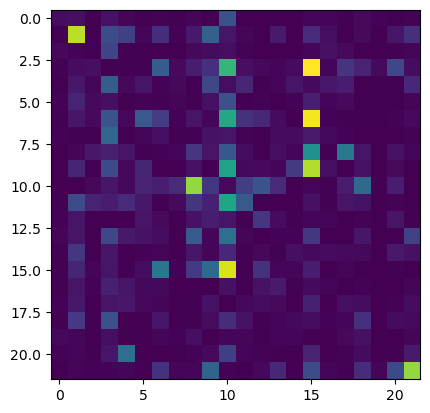

In [10]:
import matplotlib.pyplot as plt

#heatmap of C150_170_ai_aj
plt.imshow(prova)

In [11]:
tensor= torch.from_numpy(prova)
C_flat = tensor.flatten()
indices = torch.argsort(C_flat, descending=True)

# Map indices back to amino acid pairs
top_n = 10  # Number of top pairs to examine
q = 22
top_pairs = []
for idx in indices[:top_n]:
    a_i = idx // q
    a_j = idx % q
    contribution = tensor[a_i, a_j].item()
    top_pairs.append((a_i, a_j, contribution))

top_pairs


#SAME THING AS ABOVE

import numpy as np

# Number of highest terms to find
top_n = 5

# Flatten the structure and track original indices
flattened = np.concatenate(C150_170_ai_aj)
original_indices = []
for i, array in enumerate(C150_170_ai_aj):
    original_indices.extend([(i, j) for j in range(len(array))])

# Find the indices of the largest absolute values
flat_indices = np.argpartition(np.abs(flattened), -top_n)[-top_n:]
sorted_indices = flat_indices[np.argsort(-np.abs(flattened[flat_indices]))]

# Map back to the original indices
top_contributions = [(original_indices[idx][0], original_indices[idx][1], flattened[idx]) for idx in sorted_indices]

# Display the results
print("Top contributions:")
for array_idx, element_idx, value in top_contributions:
    print(f"Array {array_idx}, Index {element_idx}: Value {value:.6f}")


Top contributions:
Array 3, Index 15: Value 0.006194
Array 6, Index 15: Value 0.006099
Array 15, Index 10: Value 0.005839
Array 1, Index 1: Value 0.005567
Array 9, Index 15: Value 0.005476


In [14]:
top_pairs

[(tensor(3), tensor(15), 0.006193812641657319),
 (tensor(6), tensor(15), 0.006098784200091922),
 (tensor(15), tensor(10), 0.005838604578311106),
 (tensor(1), tensor(1), 0.005567035408230234),
 (tensor(9), tensor(15), 0.005476079473427088),
 (tensor(10), tensor(8), 0.005209219877931255),
 (tensor(21), tensor(21), 0.005203464501533838),
 (tensor(3), tensor(10), 0.004089715067637253),
 (tensor(6), tensor(10), 0.003732562156509337),
 (tensor(11), tensor(10), 0.0036618508151105103)]

In [ ]:
from Bio import SeqIO

# Path to your FASTA file
fasta_file = filename

# Amino acids of interest at positions 150 and 170
target_amino_acids = [(150, 'C'), (170, 'Q')]  # Example: 'A' at position 150, 'G' at position 170
# Parse the FASTA file and filter sequences
filtered_sequences = []
removed_sequences = []
for record in SeqIO.parse(fasta_file, "fasta"):
    sequence = str(record.seq)
    match = all(sequence[pos - 1] == amino for pos, amino in target_amino_acids)  # 1-based index in FASTA
    if match:
        removed_sequences.append(record)
    else:
        filtered_sequences.append(record)

# Save filtered sequences to a new FASTA file
output_file_filtered = "filtered_sequences.fasta"
output_file_removed = "removed_sequences.fasta"

SeqIO.write(filtered_sequences, output_file_filtered, "fasta")
SeqIO.write(removed_sequences, output_file_removed, "fasta")

print(f"Filtered sequences saved to {output_file_filtered}")
print(f"Removed sequences saved to {output_file_removed}")

Filtered sequences saved to filtered_sequences.fasta
Removed sequences saved to removed_sequences.fasta


In [23]:
import numpy as np
import torch
from Bio import SeqIO
import matplotlib.pyplot as plt

letter_to_num = {
    'A': 1,  'B': 21, 'C': 2,  'D': 3,  'E': 4,
    'F': 5,  'G': 6,  'H': 7,  'I': 8,  'J': 21,
    'K': 9,  'L': 10, 'M': 11, 'N': 12, 'O': 21,
    'P': 13, 'Q': 14, 'R': 15, 'S': 16, 'T': 17,
    'U': 21, 'V': 18, 'W': 19, 'X': 21, 'Y': 20,
    '-': 21  # Gap symbol
}

# Inverse mapping
num_to_letter = {v: k for k, v in letter_to_num.items() if v != 21}

# Parameters
top_k_contacts = 1
top_m_contributions = 1
filename = filename  # Replace with your actual FASTA file path

# Extract matched and sorted data
matched_data = [entry for entry in ranking32_23 if (entry[0], entry[1]) in fake32_23]
sorted_matched_data32_23 = sorted(matched_data, key=lambda x: x[2], reverse=True)

# Select top k contacts
top_false_contacts = sorted_matched_data32_23[:top_k_contacts]

L = 176


def get_top_contributing_pairs(JT_np, contact, top_m):
    pos1, pos2, _ = contact
    C_ai_aj = np.array([[JT_np[i][j][pos1-1][pos2-1]**2 for j in range(22)] for i in range(22)]) #TO SEE THIS POS +-1
    tensor = torch.from_numpy(C_ai_aj)
    C_flat = tensor.flatten()
    indices = torch.argsort(C_flat, descending=True)
    
    top_pairs = []
    for idx in indices[:top_m]:
        a_i = idx // 22
        a_j = idx % 22
        contribution = tensor[a_i, a_j].item()
        top_pairs.append((a_i, a_j, contribution))
    
    return top_pairs

# Aggregate constraints
constrained_positions = {}

for contact in top_false_contacts:
    top_pairs = get_top_contributing_pairs(JT_np_32_23, contact, top_m_contributions)
    pos1, pos2, _ = contact
    for a_i, a_j, contrib in top_pairs:
        aa_i = num_to_letter.get(a_i.item() + 1, None)  # Adjust indexing if necessary
        aa_j = num_to_letter.get(a_j.item() + 1, None)
        if aa_i:
            constrained_positions.setdefault(pos1-1, set()).add(aa_i) #TO SEE THIS POS +-1
        if aa_j:
            constrained_positions.setdefault(pos2-1, set()).add(aa_j) #TO SEE THIS POS +-1

print("Constrained Positions and Amino Acids:")
for pos, aas in constrained_positions.items():
    print(f"Position {pos}: {', '.join(aas)}")

def filter_sequences(fasta_file, constrained_positions, output_filtered, output_removed):
    filtered_sequences = []
    removed_sequences = []
    
    for record in SeqIO.parse(fasta_file, "fasta"):
        sequence = str(record.seq)
        remove = False
        for pos, aas in constrained_positions.items():
            if pos - 1 < len(sequence):
                if sequence[pos] in aas:
                    remove = True
                    break
        if remove:
            removed_sequences.append(record)
        else:
            filtered_sequences.append(record)
    
    SeqIO.write(filtered_sequences, output_filtered, "fasta")
    SeqIO.write(removed_sequences, output_removed, "fasta")
    
    print(f"Filtered sequences saved to {output_filtered}")
    print(f"Removed sequences saved to {output_removed}")

# Define output files
output_file_filtered = "filtered_sequences2.fasta"
output_file_removed = "removed_sequences2.fasta"

# Perform filtering
filter_sequences(filename, constrained_positions, output_file_filtered, output_file_removed)

Constrained Positions and Amino Acids:
Position 149: S
Position 169: F
Filtered sequences saved to filtered_sequences2.fasta
Removed sequences saved to removed_sequences2.fasta
